In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import GridSearchCV,cross_val_score, KFold
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-identification-with-decision-tree-b1/sample_submission.csv
/kaggle/input/digit-identification-with-decision-tree-b1/train.csv
/kaggle/input/digit-identification-with-decision-tree-b1/test.csv


In [2]:
train_data=pd.read_csv('/kaggle/input/digit-identification-with-decision-tree-b1/train.csv',header=None)
test_data=pd.read_csv('/kaggle/input/digit-identification-with-decision-tree-b1/test.csv',header=None)

In [3]:
tt=test_data
train_data = train_data.iloc[:, 1:]
test_data = test_data.iloc[:, 1:]

In [4]:
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.values

In [5]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
svd = TruncatedSVD(n_components=50, random_state=1234)
X_train_svd = svd.fit_transform(X_train_scaled)
X_val_svd = svd.transform(X_test_scaled)

In [7]:
agg = TSNE(n_components=2, random_state=1234)
X_train_agg = agg.fit_transform(X_train_svd)
X_val_agg = agg.fit_transform(X_val_svd)

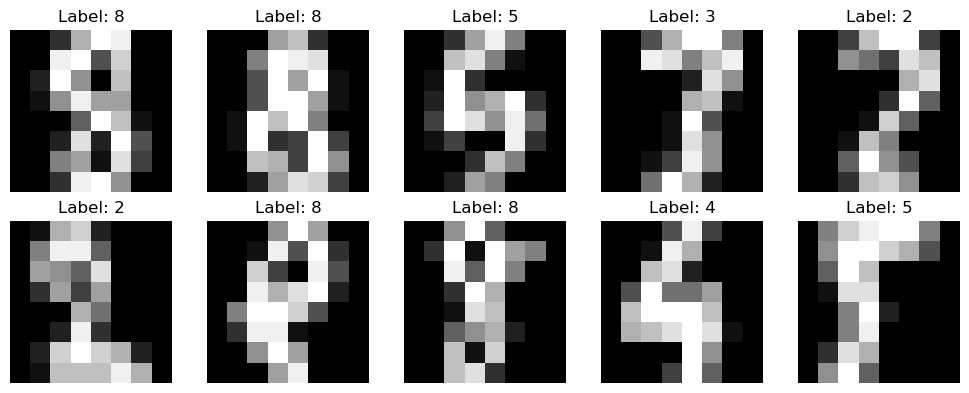

In [8]:
# Reshape the data to 2D array (8x8)
X_2d = X_train.reshape((-1, 8, 8))

# Visualize the first few images
fig, axes = plt.subplots(2, 5, figsize=(10, 4))

for i, ax in enumerate(axes.flat):
    ax.imshow(X_2d[i], cmap='gray')
    ax.set_title("Label: {}".format(y_train[i]))
    ax.axis('off')

plt.tight_layout()


In [9]:
param_grid = {
    'max_depth': [5,10],
    'criterion': ['gini', 'entropy','log_loss']
}

In [10]:
tree = DecisionTreeClassifier(random_state=1234)
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_agg, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10]},
             scoring='accuracy')

In [11]:
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [12]:
y_pred = best_model.predict(X_val_agg)
kfold = KFold(n_splits=5, shuffle=True, random_state=None)
scores = cross_val_score(best_model, X_train_agg, y_train, cv=kfold)
scores

array([0.97902098, 0.97902098, 0.98601399, 0.97202797, 0.98601399])

In [13]:
print("Best parameters:", best_params)

Best parameters: {'criterion': 'gini', 'max_depth': 10}


In [14]:
submission = pd.DataFrame({"ID": tt[0], "Category": y_pred})
submission.to_csv("submission.csv", index=False)